Para nuestro ejercicio he creado un archivo csv con datos de entrada a modo de ejemplo para clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux.

Nuestra información de entrada son 4 características que tomé de una web que utiliza Google Analytics y son:

* Duración de la visita en Segundos
* Cantidad de Páginas Vistas durante la Sesión
* Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)
* Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:

0 – Windows

1 – Macintosh

2 -Linux


La muestra es pequeña: son 170 registros para poder comprender el ejercicio, pero recordemos que para conseguir buenos resultados siempre es mejor contar con un número abundante de datos que darán mayor exactitud a las predicciones y evitarán problemas de overfitting u underfitting. (Por decir algo, de mil a 5 mil registros no estaría mal).


## Identificar Sistema Operativo de los usuarios
Para comenzar hacemos los Import necesarios con los paquetes que utilizaremos en el Ejercicio.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

Leemos el archivo csv (por sencillez, se considera que estará en el mismo directorio que el archivo de notebook .ipynb) y lo asignamos mediante Pandas a la variable dataframe. Mediante el método dataframe.head() vemos en pantalla los 5 primeros registros.

In [2]:
	
dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


A continuación llamamos al método dataframe.describe() que nos dará algo de información estadística básica de nuestro set de datos. La Media, el desvío estándar, valores mínimo y máximo de cada característica.

In [3]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Luego analizaremos cuantos resultados tenemos de cada tipo usando la función groupby y vemos que tenemos 86 usuarios “Clase 0”, es decir Windows, 40 usuarios Mac y 44 de Linux.

In [5]:
dataframe.groupby('clase').size()

clase
0    86
1    40
2    44
dtype: int64

#### Visualización de Datos
Antes de empezar a procesar el conjunto de datos, vamos a hacer unas visualizaciones que muchas veces nos pueden ayudar a comprender mejor las características de la información con la que trabajamos y su correlación.

Primero visualizamos en formato de historial los cuatro Features de entrada con nombres “duración”, “páginas”,”acciones” y “valor” podemos ver gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros.

C:\Users\tesbh\AppData\Local\Temp\ipykernel_9332\3240103012.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['clase'], 1).hist()


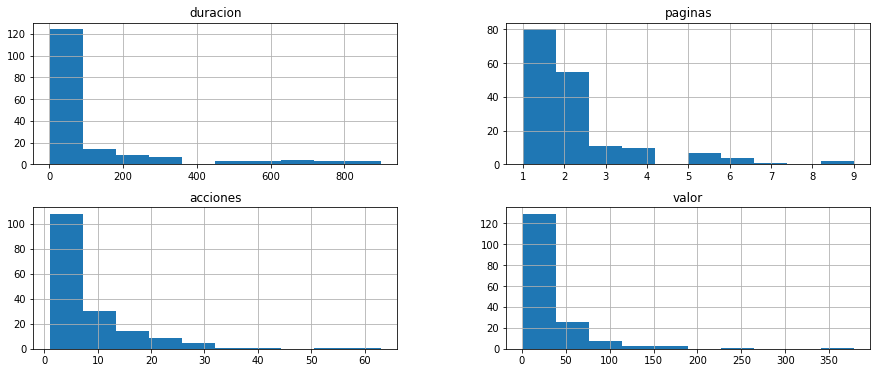

In [11]:
# Supongamos que 'dataframe' es tu DataFrame y 'clase' es la columna que deseas eliminar.
dataframe.drop(['clase'], 1).hist()

# Cambiar el tamaño de la imagen (ancho, alto) en pulgadas
tamaño_figura = (15, 6)  # Puedes ajustar estos valores según tus preferencias

# Obtener la figura actual y cambiar su tamaño
fig = plt.gcf()
fig.set_size_inches(tamaño_figura)

# Mostrar el gráfico
plt.show()

Y también podemos interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistema Operativo Windows en azul, Macintosh en verde y Linux en rojo.

C:\Users\tesbh\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


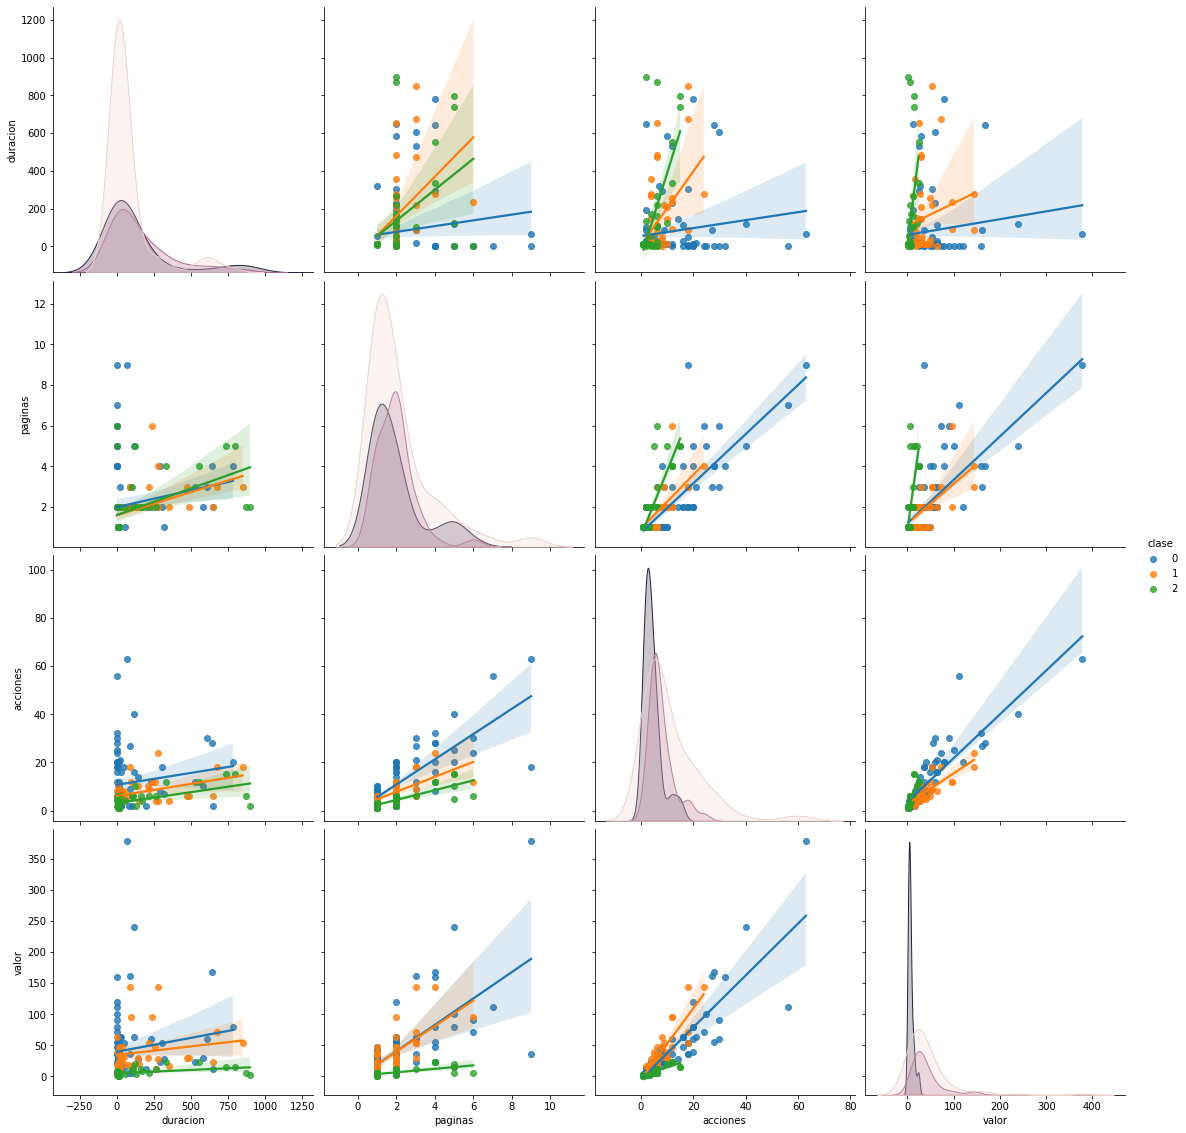

In [12]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

## Creamos el Modelo de Regresión Logística
Ahora cargamos las variables de las 4 columnas de entrada en X excluyendo la columna “clase” con el método drop(). En cambio agregamos la columna “clase” en la variable y. Ejecutamos X.shape para comprobar la dimensión de nuestra matriz con datos de entrada de 170 registros por 4 columnas.

In [13]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

C:\Users\tesbh\AppData\Local\Temp\ipykernel_9332\2703580232.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['clase'],1))


(170, 4)

Y creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.

In [14]:
model = linear_model.LogisticRegression()
model.fit(X,y)

c:\Users\tesbh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

p class=””>LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,

intercept_scaling=1, max_iter=100, multi_class=’ovr’, n_jobs=1,

penalty=’l2′, random_state=None, solver=’liblinear’, tol=0.0001,

verbose=0, warm_start=False)


Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.

In [15]:
predictions = model.predict(X)
print(predictions)[0:5]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 1
 0 1 1 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


TypeError: 'NoneType' object is not subscriptable

In [16]:
model.score(X,y)

0.7823529411764706

## Validación de nuestro modelo
Una buena práctica en Machine Learning es la de subdividir nuestro conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina desconoce). Esto evitará problemas en los que nuestro algoritmo pueda fallar por “sobregeneralizar” el conocimiento.

Para ello, subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento y 20% para validar.

In [17]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y calculamos el nuevo scoring que ahora nos da 74%.

In [20]:
from sklearn.model_selection import KFold, cross_val_score
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Realizar la validación cruzada con cross_val_score
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

# Obtener el promedio y la desviación estándar de los resultados
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.712637 (0.146407)


c:\Users\tesbh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tesbh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Y ahora hacemos las predicciones -en realidad clasificación- utilizando nuestro “cross validation set”, es decir del subconjunto que habíamos apartado. En este caso vemos que los aciertos fueron del 85% pero hay que tener en cuenta que el tamaño de datos era pequeño.

In [21]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


Finalmente vemos en pantalla la “matriz de confusión” donde muestra cuantos resultados equivocados tuvo de cada clase (los que no están en la diagonal), por ejemplo predijo 3 usuarios que eran Mac como usuarios de Windows y predijo a 2 usuarios Linux que realmente eran de Windows.

In [22]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


También podemos ver el reporte de clasificación con nuestro conjunto de Validación. En nuestro caso vemos que se utilizaron como “soporte” 18 registros windows, 6 de mac y 10 de Linux (total de 34 registros). Podemos ver la precisión con que se acertaron cada una de las clases y vemos que por ejemplo de Macintosh tuvo 3 aciertos y 3 fallos (0.5 recall). La valoración que de aqui nos conviene tener en cuenta es la de F1-score, que tiene en cuenta la precisión y recall. El promedio de F1 es de 84% lo cual no está nada mal.

In [23]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



#### Clasificación (o predicción) de nuevos valores
Como último ejercicio, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

* Tiempo Duración: 10
* Paginas visitadas: 3
* Acciones al navegar: 5
* Valoración: 9

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [24]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

c:\Users\tesbh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([2], dtype=int64)

In [26]:
X_new = pd.DataFrame({'duracion': [140], 'paginas': [17], 'acciones': [48], 'valor': [93]})
model.predict(X_new)

c:\Users\tesbh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0], dtype=int64)